In [20]:
# Shiman Ding, IEOR, 24104985
# shiman@berkeley.edu
# HW4: Parallelism
# MacBook Pro with 2 GHz Intel Core i5

In [17]:
"""
PACKAGE INSTALLATION: 
dask and dask.distributed:

conda install dask distributed -c conda-forge

profiling:
brew install graphviz  ## on a mac
sudo apt-get install graphviz ## on linux
pip install snakeviz graphviz

joblib:
conda install joblib
async HTTP

pip install aiohttp
ipyparallel:

conda install ipyparallel
ipcluster nbextension enable

"""

'\nPACKAGE INSTALLATION: \ndask and dask.distributed:\n\nconda install dask distributed -c conda-forge\n\nprofiling:\nbrew install graphviz  ## on a mac\nsudo apt-get install graphviz ## on linux\npip install snakeviz graphviz\n\njoblib:\nconda install joblib\nasync HTTP\n\npip install aiohttp\nipyparallel:\n\nconda install ipyparallel\nipcluster nbextension enable\n\n'

Q1. Use 3 methods to parallel computing and compare

In [1]:
from math import sqrt
from random import uniform
from time import time
import numpy as np

In [19]:
# Monte Carlo Simulation to count the number of darts fall into a circle, then approximate PI
# Method 1: no Parallelism
def normal_simulation(number_of_darts):
    number_in_circle = 0.0

    start_time = time()
    for n in range(number_of_darts):
        x = uniform(0, 1)
        y = uniform(0, 1)
        if sqrt((x-0.5)**2 + (y-0.5)**2)<=0.5:
            number_in_circle += 1

    end_time = time()
    execute_time = end_time - start_time
    pi_approx1 = 4 * number_in_circle / number_of_darts

    print("Method 1: normal calculation without parallelism")
    print('Pi Approximation: ', pi_approx1)
    print('Execution time: ', execute_time)
    print('Number of darts: ', number_of_darts)
    print('Darts thrown per second: ', int(number_of_darts/execute_time))
    return((execute_time, int(number_of_darts/execute_time)))

In [20]:
normal_simulation(200000)

Method 1: normal calculation without parallelism
('Pi Approximation: ', 3.13606)
('Execution time: ', 0.34288716316223145)
('Number of darts: ', 200000)
('Darts thrown per second: ', 583282)


(0.34288716316223145, 583282)

In [21]:
# define function for parallelism
def throw_dart(dummy):
    return 1 if sqrt((uniform(0, 1)-0.5)**2 + (uniform(0, 1)-0.5)**2)<=0.5 else 0


In [22]:
throw_dart(1)

1

In [23]:
# Method 2: multiprocessing to parallel computing

from multiprocessing import Pool 

def multiprocess(number_of_darts):
    pool = Pool(processes=12)
    start_time = time()
    g=pool.map_async(throw_dart, xrange(number_of_darts)).get()
    pool.close()
    pool.join()
    end_time = time()
    execute_time = end_time - start_time
    pi_approx2 = 4 * sum(g) / number_of_darts
    del pool

    print("Method 2: parallel computing using MULTIPROCESSING.POOL")
    print('Pi Approximation: ', pi_approx2)
    print('Execution time: ', execute_time)
    print('Number of darts: ', number_of_darts)
    print('Darts thrown per second: ', int(number_of_darts/execute_time))
    return(execute_time, int(number_of_darts/execute_time))

In [24]:
multiprocess(200000)

Method 2: parallel computing using MULTIPROCESSING.POOL
('Pi Approximation: ', 3)
('Execution time: ', 0.2578999996185303)
('Number of darts: ', 200000)
('Darts thrown per second: ', 775494)


(0.2578999996185303, 775494)

In [25]:
# Method 3: dask to parallel computing
import numpy as np
import dask.array as da


def dask_parallel(number_of_darts):
    start_time = time()
    x = da.random.uniform(0, 1, size=number_of_darts, chunks=100)   # Cut into 1000 sized chunks
    y = da.random.uniform(0, 1, size=number_of_darts, chunks=100)   
    dart_in = (x-0.5)**2 + (y-0.5)**2 < 0.5**2
    end_time = time()
    execute_time = end_time - start_time
    pi_approx3 = 4 * sum(dart_in.compute()) / number_of_darts

    print("Method 3: parallel computing using DASK")
    print('Pi Approximation: ', pi_approx3)
    print('Execution time: ', execute_time)
    print('Number of darts: ', number_of_darts)
    print('Darts thrown per second: ', int(number_of_darts/execute_time))
    return(execute_time, int(number_of_darts/execute_time))

In [26]:
dask_parallel(200000)

Method 3: parallel computing using DASK
('Pi Approximation: ', 3)
('Execution time: ', 0.2674520015716553)
('Number of darts: ', 200000)
('Darts thrown per second: ', 747797)


(0.2674520015716553, 747797)

In [27]:
lista = list()
lista.append(1)
lista

[1]

In [31]:
import numpy as np
darts_num = np.logspace(1,7,9)
darts_num = darts_num.astype(int)
Simple = list()
Multiprocessing= list()
Dask = list() 
# try different darts number and see how scaling affets parallel
for num in darts_num:
    Simple.append(normal_simulation(num))
    Multiprocessing.append(multiprocess(num))
    Dask.append(dask_parallel(num))

Method 1: normal calculation without parallelism
('Pi Approximation: ', 3.2)
('Execution time: ', 4.291534423828125e-05)
('Number of darts: ', 10)
('Darts thrown per second: ', 233016)
Method 2: parallel computing using MULTIPROCESSING.POOL
('Pi Approximation: ', 3)
('Execution time: ', 0.15224504470825195)
('Number of darts: ', 10)
('Darts thrown per second: ', 65)
Method 3: parallel computing using DASK
('Pi Approximation: ', 2)
('Execution time: ', 0.023983001708984375)
('Number of darts: ', 10)
('Darts thrown per second: ', 416)
Method 1: normal calculation without parallelism
('Pi Approximation: ', 3.4285714285714284)
('Execution time: ', 0.0001590251922607422)
('Number of darts: ', 56)
('Darts thrown per second: ', 352145)
Method 2: parallel computing using MULTIPROCESSING.POOL
('Pi Approximation: ', 3)
('Execution time: ', 0.16540098190307617)
('Number of darts: ', 56)
('Darts thrown per second: ', 338)
Method 3: parallel computing using DASK
('Pi Approximation: ', 3)
('Executio

In [32]:
Simple_time = [x[0] for x in Simple]
Simple_rate = [x[1] for x in Simple]
multiprocess_time = [x[0] for x in Multiprocessing]
multiprocess_rate = [x[1] for x in Multiprocessing]
Dask_time = [x[0] for x in Dask]
Dask_rate = [x[1] for x in Dask]


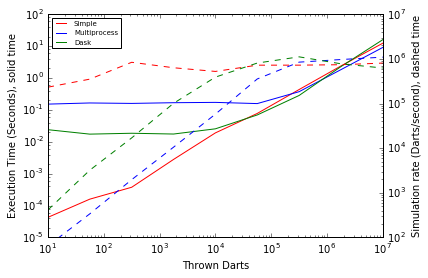

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
plt.yscale('log')
plt.xscale('log')
ax1.set_yscale("log") 
ax2.yaxis.tick_right() 
simple1 = ax1.plot(darts_num, Simple_time, color = 'red', 
         linestyle = '-', label = "Simple")
simple2 = ax2.plot(darts_num, Simple_rate, color = 'red', 
         linestyle = '--', label = "Simple")
multiprocess1 = ax1.plot(darts_num, multiprocess_time, color = 'blue', 
         linestyle = '-', label = "Multiprocess")
multiprocess2 = ax2.plot(darts_num, multiprocess_rate, color = 'blue', 
         linestyle = '--', label = "Multiprocess")
Dask1 = ax1.plot(darts_num, Dask_time, color = 'green', 
         linestyle = '-', label = "Dask")
Dask2 = ax2.plot(darts_num, Dask_rate, color = 'green', 
         linestyle = '--', label = "Dask")

ax1.minorticks_on()
ax1.set_ylim(10**(-5), 10**2)
ax1.set_ylabel('Execution Time (Seconds), solid time')
ax1.set_xlabel('Thrown Darts')
ax2.minorticks_on()
ax2.set_ylim(10**2, 10**7)
ax2.set_ylabel('Simulation rate (Darts/second), dashed time')
ax1.legend(prop={'size':7}, loc = 0)